In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt

from alp.models import ALP
from alp.models import F_lepton_2body
from alp.models import Gamma_tau
from alp import plot_tools as pt

import scipy
smear_stddev=0.5
smear=False

In [3]:
def plot_other_limits_LFC(ax, muphobic=False, alp=None, linewidth=1, nocolor='lightgrey', edgecolor='dimgrey'):

    # BaBar Limit
    ma, qsi = np.genfromtxt("digitized/BABAR_leptophilic.dat", unpack=True)
    ax.fill_between(
        ma,
        qsi / const.vev_EW,
        qsi / qsi*100,
        color=nocolor,
        edgecolor="None",
        linestyle="-",
    )
    ax.plot(
        ma,
        qsi / const.vev_EW,
        color=edgecolor,
        linestyle="-",
        lw=linewidth,
    )

    # Belle Limit
    ma, qsi = np.genfromtxt("digitized/Belle_leptophilic.dat", unpack=True)
    ax.fill_between(
        ma,
        qsi / const.vev_EW,
        qsi / qsi,
        color="silver",
        edgecolor="None",
        linestyle="-",
    )
    ax.plot(
        ma,
        qsi / const.vev_EW,
        color=edgecolor,
        linestyle="-",
        lw=linewidth,
    )

    ###########################################################
    # ma, y = np.genfromtxt("digitized/E137_Araki_et_al_LFC.dat", unpack=True)
    # inv_fa = y / const.m_e
    # ma[ma > 2 * const.m_mu] = 2*const.m_mu
    # x, y = pt.get_ordered_closed_region([ma, inv_fa], logx=True, logy=True)
    # ax.fill(
    #     x,
    #     y,
    #     facecolor=nocolor,
    #     edgecolor="red",
    #     linestyle="-",
    #     zorder=1.1,
    #     linewidth=1,
    #     # label='E137 (Araki et al. 2021)',
    # )

    ###########################################################
    if muphobic:
        x, y = np.genfromtxt("digitized/E137_Araki_et_al_LFC.dat", unpack=True)
        y = y / const.m_e 
        # y = np.append(y, y[np.argmin(x*y)])
        # x = np.append(x, 1e-3)
        x, y = pt.get_ordered_closed_region([x, y], logx=True, logy=True)
        ax.fill(
            x,
            y,
            facecolor="lightgrey",
            edgecolor="None",
            linestyle="-",
            zorder=0.4,
        )
        ax.fill(
            x,
            y,
            facecolor="None",
            edgecolor=edgecolor,
            linestyle="-",
            zorder=1.01,
            linewidth=2*linewidth,
        )


        x, y = np.genfromtxt("digitized/E137_Liu_et_al_LFC.dat", unpack=True)
        x = x * 1e-3
        y = const.eQED * y / const.m_e 
        y = y[x > 1e-3]
        x = x[x >1e-3]

        x, y = pt.get_ordered_closed_region([x, y], logx=True, logy=True)
        ax.fill(
            x,
            y,
            facecolor="lightgrey",
            edgecolor="None",
            linestyle="-",
            zorder=0.4,
        )
        ax.fill(
            x,
            y,
            facecolor="None",
            edgecolor=edgecolor,
            linestyle="-",
            zorder=1.01,
            linewidth=2*linewidth,
        )


    else: 
        x, y = np.genfromtxt("digitized/E137_Liu_et_al_LFC.dat", unpack=True)
        x = x * 1e-3
        y = const.eQED * y / const.m_e 
        y = y[x > 1e-3]
        x = x[x >1e-3]

        x, y = pt.get_ordered_closed_region([x, y], logx=True, logy=True)
        ax.fill(
            x,
            y,
            facecolor="lightgrey",
            edgecolor="None",
            linestyle="-",
            zorder=0.4,
        )
        ax.fill(
            x,
            y,
            facecolor="None",
            edgecolor=edgecolor,
            linestyle="-",
            zorder=1.01,
            linewidth=2*linewidth,
        )


    ###########################################################
    x, y = np.genfromtxt("digitized/Orsay_Liu_et_al.dat", unpack=True)
    x = x * 1e-3
    y = const.eQED * y / const.m_e
    x, y = pt.get_ordered_closed_region([x, y], logx=True, logy=True)
    ax.fill(
        x,
        y,
        facecolor="lightgrey",
        edgecolor="None",
        linestyle="-",
        zorder=0.4,
        # label='E137 (Araki et al. 2021)',
    )
    ax.fill(
        x,
        y,
        facecolor="None",
        edgecolor=edgecolor,
        linestyle="-",
        zorder=1.01,
        linewidth=2*linewidth,
        # label='E137 (Araki et al. 2021)',
    )
    ###########################################################
    x, y = np.genfromtxt("digitized/NA64_pseudoscalar.dat", unpack=True)
    x = x * 1e-3
    y = const.eQED * y / const.m_e
    x, y = pt.get_ordered_closed_region([x, y], logx=True, logy=True)
    ax.fill(
        x,
        y,
        facecolor="lightgrey",
        edgecolor="None",
        linestyle="-",
        zorder=0.4,
        # label='E137 (Araki et al. 2021)',
    )
    ax.fill(
        x,
        y,
        facecolor="None",
        edgecolor=edgecolor,
        linestyle="-",
        zorder=1.01,
        linewidth=2*linewidth,
        # label='E137 (Araki et al. 2021)',
    )

    ###########################################################
    x, y = np.genfromtxt("digitized/E141_Liu_et_al.dat", unpack=True)
    x = x * 1e-3
    y = const.eQED * y / const.m_e
    x, y = pt.get_ordered_closed_region([x, y], logx=True, logy=True)
    ax.fill(
        x,
        y,
        facecolor="lightgrey",
        edgecolor="None",
        linestyle="-",
        zorder=0.4,
        # label='E137 (Araki et al. 2021)',
    )
    ax.fill(
        x,
        y,
        facecolor="None",
        edgecolor=edgecolor,
        linestyle="-",
        zorder=1.01,
        linewidth=2*linewidth,
        # label='E137 (Araki et al. 2021)',
    )


    # Create a new figure with a specific size
    norm = 1/2/const.m_e # gee 

    ma, ge = np.genfromtxt('digitized/SN1987A_cooling_cool.dat', unpack=True)
    ma = ma * 1e-3
    inv_fa = ge *norm
    x,y=pt.get_ordered_closed_region([ma, inv_fa], logx=True, logy=True)
    ax.fill(x, y, facecolor=nocolor, edgecolor=edgecolor, alpha=1, zorder=1.1, linewidth=linewidth)

    # ma, ge = np.genfromtxt('digitized/SN1987A_B=1_cool.dat', unpack=True)
    # ma = ma * 1e-3
    # inv_fa = ge *norm
    # x,y=pt.get_ordered_closed_region([ma, inv_fa], logx=True, logy=True)


    # ax.plot(x, y, ls=(1,(1,1)), color='black', alpha=1, zorder=2, linewidth=linewidth*2)


    ma, ge = np.genfromtxt('digitized/SN1987A_B=0.1_cool.dat', unpack=True)
    ma = ma * 1e-3
    inv_fa = ge *norm
    x,y=pt.get_ordered_closed_region([ma, inv_fa], logx=True, logy=True)
    plt.plot(x, y, color='silver', zorder=1.1, linewidth=1)
    ax.fill(x, y, facecolor=pt.lighten_color(nocolor,0.5), edgecolor='black', alpha=1, zorder=-1.1, linewidth=linewidth)

    # Load the data from the files
    data1 = np.loadtxt('digitized/CHARM.dat')
    data1[:,0] *= 1e-3
    data1[:,1] *= 2
    data2 = np.loadtxt('digitized/electron_gminus2.dat')
    data2[:,0] *= 1e-3
    data2[:,1] *= 2
    data3 = np.loadtxt('digitized/pion_decay_weak_preserving.dat')
    data3[:,0] *= 1e-3
    data3[:,1] *= 2

    # bddata = np.loadtxt('digitized/beam_dump_combined.dat')
    # bddata[:,0] *= 1e-3
    # bddata[:,1] *= 2
    # x, y = pt.get_ordered_closed_region(bddata.T, logx=True, logy=True)
    # ax.fill(x, norm*y,facecolor=nocolor, edgecolor='None', alpha=1, zorder=1)
    # if linewidth:
    #     ax.fill(x, norm*y, facecolor='None', edgecolor='red', ls=(1,(5,2)), lw=linewidth, zorder=1.1)

    x, y = pt.get_ordered_closed_region(data1.T, logx=True, logy=True)
    ax.fill(x, norm*y, facecolor=nocolor, edgecolor='None', alpha=1, zorder=1)
    if linewidth:
        ax.fill(x, norm*y, facecolor='None', edgecolor=edgecolor, ls=(1,(3,1)), lw=linewidth*2, zorder=1.1)

    # W_LIMIT = 2.1e-4
    # ax.fill_between(np.linspace(1e-3,0.5, 2), norm*np.ones(2)*W_LIMIT, np.ones(2), facecolor=nocolor, edgecolor='None', alpha=1, zorder=1)
    # ax.fill_between(np.linspace(1e-3,0.5, 2), norm*np.ones(2)*W_LIMIT, np.ones(2), edgecolor='black', facecolor='None', lw=linewidth, zorder=1.1)
    ax.fill_between(data2[:, 0], norm*data2[:, 1], 1e5*np.ones(len(data2[:, 1])), facecolor=nocolor, edgecolor='None', alpha=1, zorder=1)
    ax.fill_between(data3[:, 0], norm*data3[:, 1], 1e5*np.ones(len(data3[:, 1])), facecolor=nocolor, edgecolor='None', alpha=1, zorder=1)
    ax.fill_between(data3[:, 0], norm*data3[:, 1], 1e5*np.ones(len(data3[:, 1])), edgecolor=edgecolor, facecolor='None', lw=linewidth, zorder=1.1)


    # Add text labels to the gray regions
    if linewidth:
        ax.annotate(r'SN cooling argument', xy=(2.4e-3, 1.2e-5/2), fontsize=10, color='grey', ha='left', va='bottom')
        ax.annotate(r'SN energy argument', xy=(0.22, 1.2e-5/2), fontsize=10, color='grey', ha='left', va='bottom')
        ax.annotate(r'CHARM (Dror et al)', xy=(0.002, norm*2.2e-7), fontsize=10, color='grey', ha='left', va='bottom', rotation=-22)
        # ax.annotate(r'Beam dumps (Dror et al)', xy=(2.4e-3, norm*2e-8), fontsize=10, color='grey', ha='left', va='bottom', rotation=0)
        # ax.annotate(r'E137 (Dror et al)', xy=(2.4e-3, norm*7e-8), fontsize=10, color=pt.lighten_color('red',0.5), ha='left', va='bottom', rotation=0)
        if muphobic:
            ax.annotate(r'E137 (Araki et al)', xy=(2e-2, norm*2.5e-8), fontsize=10, color='grey', ha='left', va='bottom', rotation=0)
            ax.annotate(r'E137 (Liu et al)', xy=(2.4e-3, norm*7e-8), fontsize=10, color='grey', ha='left', va='bottom', rotation=0)
        else:
            ax.annotate(r'E137 (Liu et al)', xy=(2.4e-3, norm*7e-8), fontsize=10, color='grey', ha='left', va='bottom', rotation=0)
        # ax.annotate(r'Beam dumps', xy=(1.2e-3, 0.8e-7), fontsize=10, color='grey', ha='left', va='bottom')
        ax.annotate(r'BaBar/Belle', xy=(0.4, norm*4e-6), fontsize=10, color='grey', ha='left', va='bottom')
        ax.annotate(r'SINDRUM', xy=(0.02, 0.5), fontsize=10, color='grey', ha='left', va='bottom')
        # ax.annotate(r'$\pi^+ \to e^+ \nu_e a$', xy=(0.07, norm*1.4e-6), fontsize=10, color='grey', ha='left', va='bottom')
        ax.annotate(r'Orsay', xy=(1.6e-2, 1e-2), fontsize=10, color='grey', ha='left', va='bottom', rotation=-30)
        ax.annotate(r'NA64', xy=(6e-3, 3.6e-1), fontsize=10, color='grey', ha='left', va='bottom', rotation=-36)
        ax.annotate(r'E141', xy=(5e-3, 1.6e-1), fontsize=10, color='grey', ha='left', va='bottom', rotation=-36)

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_63717/223376470.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=10)


(0.002, 1.8)

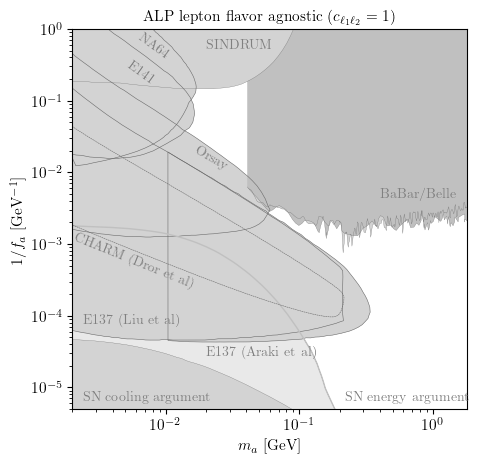

In [4]:
fig, ax = pt.std_fig(figsize=(5,5))

name = 'anarchy' 
lamb = 1
c_lepton = np.array([[1, lamb**2, lamb], 
                     [lamb**2, 1, lamb],
                     [lamb, lamb, 1]
                     ])

plot_other_limits_LFC(ax, linewidth=0.2, muphobic=True)

ma, fa = np.geomspace(1e-2, 1.8, 1000), np.geomspace(1, 1e5, 1000)
MA, FA = np.meshgrid(ma, fa)

alp = ALP(MA, FA, c_lepton=c_lepton)
Eavg = 20 # GeV
# ax.contour(MA, 1/FA, const.get_decay_rate_in_cm(alp.Gamma_a/(Eavg/MA))*1e-2, levels=[179], colors='black', linewidths=1.5, linestyles='solid', alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_title(r'ALP lepton flavor agnostic ($c_{\ell_1 \ell_2}  = 1$)', fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.set_ylim(5e-6,1)
ax.set_xlim(2e-3,1.8)



In [20]:
def main_plot(BP_NAME, c_lepton, c_NN, mN, fa_power=1, plot_DUNEs=True, figsize=(5,5), smear=False, ymax=1e-3, ymin=1e-10, xmin=1e-2, xmax=2, ncol=1, loc='upper right', yscale='log', xscale='log', legend=True, name_modifier='', vlines=True, linewidth=0.5):
    
    fig, ax = pt.std_fig(figsize=figsize)

    plot_other_limits_LFC(ax, linewidth=linewidth, muphobic=c_lepton[1,1] == 0)

    # labels for legend
    labels = []
    labelnames = []
    name=BP_NAME

    Nsig = 2.3
    X,Y,Z = np.load(f'data/CHARM_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[0], 0.5)], alpha=1, zorder=1.2)
    _ = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('CHARM')

    X,Y,Z = np.load(f'data/BEBC_rates{name}.npy', allow_pickle=True)
    c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[1], 0.5)], alpha=1, zorder=1.2)
    _ = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('BEBC')

    # X,Y,Z = np.load(f'data/NoVA_rates{name}.npy', allow_pickle=True)
    # # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('darkorange', 0.5)], alpha=1, zorder=1.3)
    # c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(2,1))], linewidths=[1.75], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append('NOvA')

    # X,Y,Z = np.load(f'data/MicroBooNE_rates{name}.npy', allow_pickle=True)
    # # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.2)
    # c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles=[(1,(4,1,))], linewidths=[1.75], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append('$\mu$BooNE (NuMI)')

    # X,Y,Z = np.load(f'data/ICARUS_rates{name}.npy', allow_pickle=True)
    # if smear: 
    #     Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode='constant', order=0, cval=0)
    # # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.1)
    # c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(6,0))], linewidths=[1.75], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append('ICARUS (NuMI)')


    X1,Y1,Z1 = np.load(f'data/ProtoDUNE-NP02_rates{name}.npy', allow_pickle=True)
    _,_,Z2 = np.load(f'data/ProtoDUNE-NP02_rates{name}.npy', allow_pickle=True)
    X,Y,Z = X1, Y1, Z1+Z2
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(3,2))], linewidths=[1.75], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'ProtoDUNE')
    
    if plot_DUNEs:
        X,Y,Z = np.load(f'data/DUNE-ND_rates{name}.npy', allow_pickle=True)
        if smear: 
            Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
        c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='limegreen', linestyles=[(1,(1,0))], linewidths=[1.75], alpha=1, zorder=2)
        labels.append(c.legend_elements()[0][0])
        labelnames.append(r'DUNE ND')

        # X,Y,Z = np.load(f'data/2x2 protoDUNE-ND_rates{name}.npy', allow_pickle=True)
        # if smear: 
        #     Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
        # c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='red', linestyles=[(1,(1,1))], linewidths=[1.75], alpha=1, zorder=2)
        # labels.append(c.legend_elements()[0][0])
        # labelnames.append(r'2x2 protoDUNE ND')

    # X,Y,Z = np.load(f'data/FASER_rates{name}.npy', allow_pickle=True)
    # if smear: 
    #     Z = scipy.ndimage.filters.gaussian_filter(Z, 2*smear_stddev, mode="nearest", order=0, cval=0)
    # # c = ax.contourf(X, Y**fa_power, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color='black', 0.95)], alpha=1, zorder=1.91)
    # c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='black', linestyles=[(0,(2,2))], linewidths=[1.5], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append('FASER')

    X,Y,Z = np.load(f'data/FASER2_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='black', linestyles=[(1,(5,1))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'FASER-2')
    

    X,Y,Z = np.load(f'data/SHiP_rates{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='black', linestyles='-', linewidths=[1.75], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'SHiP')



    if legend:
        ax.legend(labels, labelnames, loc=loc, fontsize=8.5, ncol=ncol, frameon=True, framealpha=0.8, edgecolor='black', fancybox=False, handlelength=2.5, handletextpad=0.5, labelspacing=0.5, borderpad=0.5)


    if c_lepton[0,0] == c_lepton[2,2] and c_lepton[1,1] == c_lepton[2,2]:
        title=r'{\bf LFC flavor universal} $\,\,\vert\,\,$'
        title+=rf'$g_{{\ell \ell}} = {int(c_lepton[0,0])}$'    
    elif c_lepton[1,1] == 0:
        title=r'{\bf LFC $e-\tau$ coupled} $\,\,\vert\,\,$'
        title+=rf'$g_{{e e}} = g_{{\tau \tau}} = {int(c_lepton[0,0])}$ $\,\,\vert\,\,$ $g_{{\mu \mu}} = {int(c_lepton[1,1])}$'    
    
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    ax.set_ylabel(rf'$f_a^{{{-fa_power}}}$ [GeV$^{{{-fa_power}}}$]')
    ax.set_xlabel(r'$m_a$ [GeV]')

    # ax.set_ylim(1e-10/2,1e-4)
    ax.set_ylim(ymin**fa_power,ymax**fa_power)
    ax.set_xlim(xmin,xmax)

    # ax.vlines(const.m_tau - const.m_e, ymin, ymax, color='black', linestyle='--', lw=0.5)
    # ax.annotate(r'$m_{\tau} - m_e$', (1.1*(const.m_tau - const.m_e), ymax/1.1), fontsize=9.5, ha='center', va='top', rotation=90)

    # ax.vlines(const.m_tau - const.m_mu, ymin, ymax, color='black', linestyle='--', lw=0.5)
    # ax.annotate(r'$m_{\tau} - m_\mu$', (0.92*(const.m_tau - const.m_mu), ymax/1.1), fontsize=9.5, ha='center', va='top', rotation=90)

    if vlines:
        ax.vlines(2*const.m_mu, ymin, ymax, color='grey', linestyle='--', lw=0.5)
        ax.annotate(r'$2 m_\mu$', (0.92*(2*const.m_mu), ymin*1.1), fontsize=9.5, ha='center', va='bottom', rotation=90, color='grey')

        ax.vlines(const.m_mu+const.m_e, ymin, ymax, color='grey', linestyle='--', lw=0.5)
        ax.annotate(r'$m_\mu + m_e$', (0.92*(const.m_mu+const.m_e), ymin*1.1), fontsize=9.5, ha='center', va='bottom', rotation=90, color='grey')

    # title+=rf'$\,\vert\, m_{{\psi}} = {mN}$'
    # ax.grid(which='both')

    ax.set_title(title, fontsize=11, pad=7.5)

    fig.savefig(f'plots/ALP_benchmark_{name}{name_modifier}.pdf', bbox_inches='tight', dpi=400)



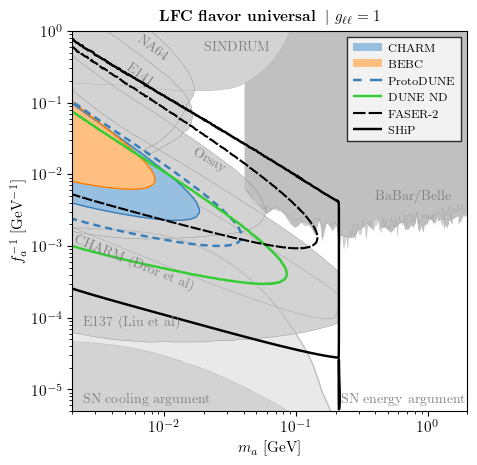

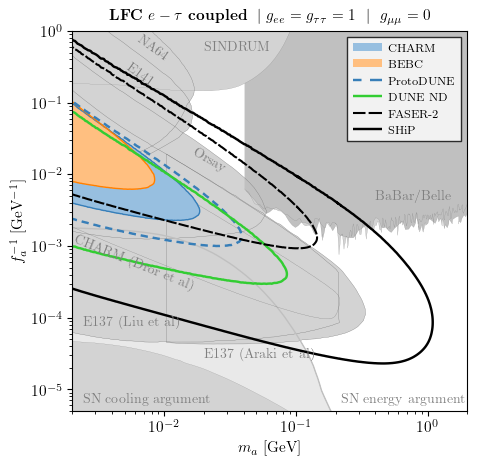

In [21]:
BP_NAME = 'LFC_universal'
c_lepton = np.diag([1, 1, 1])
main_plot(BP_NAME, c_lepton, 0, 0, ymin=5e-6, ymax=1, xmin=2e-3, xmax=2, figsize=(5,5), loc='upper right', ncol=1, vlines=False, linewidth=0.1)

BP_NAME = 'LFC_etau'
c_lepton = np.diag([1, 0, 1])
main_plot(BP_NAME, c_lepton, 0, 0, ymin=5e-6, ymax=1, xmin=2e-3, xmax=2, figsize=(5,5), loc='upper right', ncol=1, vlines=False, linewidth=0.1)

In [372]:
def make_Bvis_plot(BP_NAME, c_lepton, c_NN, mN, ma_fixed, smear=False, ymax=1e-3, ymin=1e-10):
    
    fig, ax = pt.std_fig(figsize=(5,5))

    pt.plot_other_limits_Bvis(ax, ma_fixed=ma_fixed, c_lepton=c_lepton, c_NN=c_NN, mN=mN, linewidth=0.0)

    # labels for legend
    labels = []
    labelnames = []
    name=BP_NAME

    Nsig = 2.3
    X,Y,Z = np.load(f'data/invfa_vs_Bvis_CHARM_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[0], 0.5)], alpha=1, zorder=1.5)
    _ = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('CHARM')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_BEBC_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color(pt.CB_color_cycle[1], 0.5)], alpha=1, zorder=1.4)
    _ = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles='-', linewidths=[1], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('BEBC')


    # X,Y,Z = np.load(f'data/NA62_rates{name}.npy', allow_pickle=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('firebrick', 0.85)], alpha=1, zorder=1.1)
    # _ = ax.contour(X, Y, Z, levels=[Nsig], colors='firebrick', linestyles='-', linewidths=[1], alpha=1, zorder=2)
    # labels.append(c.legend_elements()[0][0])
    # labelnames.append(r'NA62 ($1.4\times 10^{17}$ POT)')


    X,Y,Z = np.load(f'data/invfa_vs_Bvis_NoVA_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('darkorange', 0.5)], alpha=1, zorder=1.3)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(2,1))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('NOvA')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_MicroBooNE_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.2)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[1], linestyles=[(1,(4,1))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('$\mu$BooNE (NuMI)')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_ICARUS_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode='constant', order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.1)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors=pt.CB_color_cycle[0], linestyles=[(1,(6,0))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('ICARUS (NuMI)')


    X1,Y1,Z1 = np.load(f'data/invfa_vs_Bvis_ProtoDUNE-NP02_rates_{name}.npy', allow_pickle=True)
    _,_,Z2 = np.load(f'data/invfa_vs_Bvis_ProtoDUNE-NP02_rates_{name}.npy', allow_pickle=True)
    X,Y,Z = X1, Y1, Z1+Z2
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='lightgreen', linestyles=[(1,(3,2))], linewidths=[1.25], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'ProtoDUNE')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_FASER_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, 2*smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color='black', 0.95)], alpha=1, zorder=1.91)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles=[(1,(2,0.5))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append('FASER')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_FASER2_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles=[(1,(5,1))], linewidths=[1.5], alpha=1, zorder=2)
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'FASER-2')

    X,Y,Z = np.load(f'data/invfa_vs_Bvis_SHiP_rates_{name}.npy', allow_pickle=True)
    if smear: 
        Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
    X,Y,Z = pt.interp_grid(X.flatten(), Y.flatten(), Z.flatten(), logx=True, logy=True)
    c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles='-', linewidths=[1.75], alpha=1, zorder=2)
    # x,y = c.collections[0].get_paths()[0].vertices[:,0],c.collections[0].get_paths()[0].vertices[:,1]
    # # x=np.append([1e-2], x)
    # # y=np.append([1e-2], y)
    # x,y=pt.plot_closed_region((x,y), logx=True, logy=True)
    # c = ax.plot(x,y, edgecolor='black', facecolor='None', linestyle='-', linewidth=1.75, alpha=1, zorder=2)
    # labels.append(c[0])
    labels.append(c.legend_elements()[0][0])
    labelnames.append(r'SHiP')

    ax.legend(labels, labelnames, loc='upper left', fontsize=8.5, ncol=1, frameon=True, framealpha=0.8, edgecolor='black', fancybox=False, handlelength=2.5, handletextpad=0.5, labelspacing=0.5, borderpad=0.5)

    if c_lepton[0,0] != c_lepton[0,2]:
        title=r'{\bf LFV hierarchy} $\,\,\vert\,\,$'
        title+=rf'$g_{{\ell \ell}} = {int(c_lepton[0,0])}$'
        title+=rf'$\,\,\vert\,\, g_{{(e,\mu)\tau}} = \lambda$'
        title+=rf'$\,\,\vert\,\, g_{{e\mu}} = \lambda^2 $'
        title+=rf'$\,\,\vert\,\, \lambda = {pt.sci_notation(c_lepton[1,2], notex=True, precision=1)}$'
    
    elif c_lepton[0,0] == c_lepton[0,2]:
        title=r'{\bf LFV anarchy} $\,\,\vert\,\,$'
        # ax.annotate(r'\noindent \bf LFV anarchy \\ $\tau$ limits only', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
        title+=rf'$g_{{\ell_1 \ell_2}} = {int(c_lepton[0,0])}$'
    
    title+=rf'$\,\vert\, m_a = {ma_fixed}$~GeV'
    
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
    ax.set_xlabel(r'$\mathcal{B}(a \to {\rm vis}) = 1 - \mathcal{B}(a\to \text{dark sector})$')
    ax.set_ylim(ymin,ymax)
    # ax.set_xlim(X.min(), 1)
    ax.set_xlim(1e-6, 1)

    ax.set_title(title, fontsize=11, pad=10)
    # ax.invert_xaxis()
    # ax.set_xticklabels(ax.get_xticklabels()[::-1])
    fig.savefig(f'plots/ALP_benchmark_{name}_Bvis.pdf', bbox_inches='tight', dpi=400)

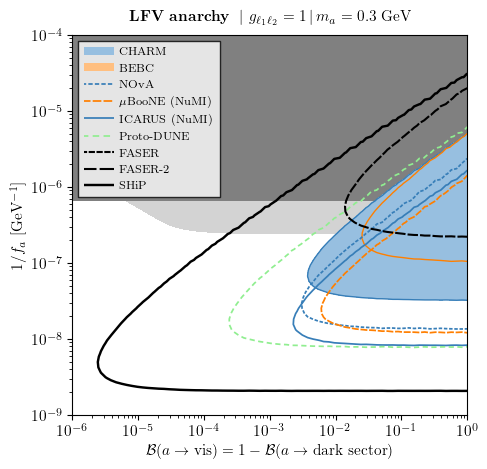

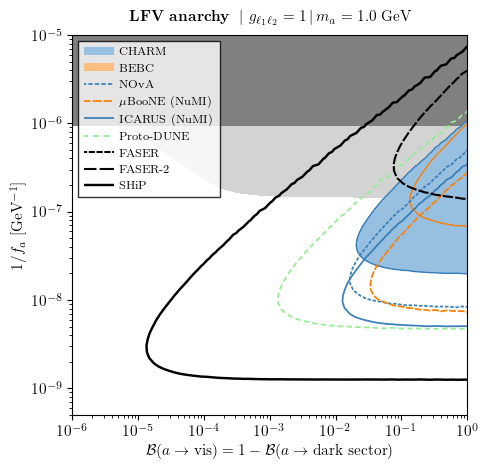

In [1065]:
lamb = 1
c_lepton = np.array([[1, 1, 1], 
                     [1, 1, 1], 
                     [1, 1, 1]])

BP_NAME = f'anarchy_inv_ma_0.3'
make_Bvis_plot(BP_NAME, c_lepton, 0 , 0, ma_fixed=0.3, ymin=1e-9, ymax=1e-4)

BP_NAME = f'anarchy_inv_ma_1.0'
make_Bvis_plot(BP_NAME, c_lepton, 0, 0, ma_fixed=1.0, ymin=5e-10, ymax=1e-5)
